In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Задачи 1 и 2

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Случайная величина X задаёт число правильных ответов при простом угадывании. Найдите математическое ожидание данной случайной величины. Найдите дисперсию случайной величины X.

Подсказка: постройте закон распределения случайной величины X.

#### Решение:

Вариантов выбора ответа 4, следовательно вероятность выбора правильного ответа p_i = 0.25. Вопросов 5, n = 5. k - количество верно отгаданных вопросов может быть от 0 до 5.

Сама задача на использование биномиального закона распределения.

$P(X = k) = C_n^k p^k (1 - p)^{n - k}$

Математическое ожидание

$M(X) = n * p_i$

Дисперсия

$D(X) = n * p_i * (1 - p_i)$


Вероятность ответить на 0 вопросов: 0.2373046875
Вероятность ответить на 1 вопросов: 0.3955078125
Вероятность ответить на 2 вопросов: 0.263671875
Вероятность ответить на 3 вопросов: 0.087890625
Вероятность ответить на 4 вопросов: 0.0146484375
Вероятность ответить на 5 вопросов: 0.0009765625

Полная вероятность равна 1.0

Математическое ожидание равно 1.25

Дисперсия равна 0.9375


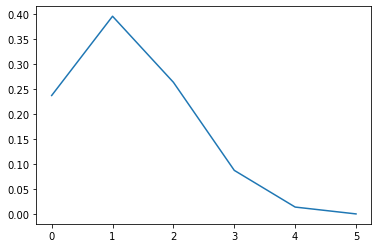

In [2]:
def combinations(n: int, k: int) -> int:
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

p_full = []

for k in range(0, 6):
    n = 5
    p_i = 0.25
    q = 1 - p_i
    p = combinations(n, k)*(p_i**k)*(q**(n-k))
    p_full.append(p)
    print(f"Вероятность ответить на {k} вопросов: {p}")
print("\nПолная вероятность равна", sum(p_full))
print("\nМатематическое ожидание равно", n * p_i)
print("\nДисперсия равна", n * p_i * (1 - p_i))

plt.plot(p_full)


### Задача 3

Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день

#### Решение:

Допустим, что рассматриваемая величина имеет распределение Пуассона.

Кроме того, полагаем под фразой "текущий день" - текущие сутки. Так как определиться с понятием день без уточнения дополнительных данных иным образом невозможно.

In [9]:
def poisson_proba(k: int, lambda_: float) -> float:
    
    return (lambda_ ** k) * (np.exp(-lambda_)) / np.math.factorial(k)

p = 0.95
lambda_ = 10

n = 0

while True:
    p_sum = sum(poisson_proba(i, lambda_) for i in range(n))
    print(f"Вероятность получения {n} писем - {p_sum}")
    if p_sum > p:
        n = n - 1
        break
    else:
        n += 1
    

print(f"\nС вероятностью более 0.95% пользователь получит не более {n} писем со спамом за текущий день")

Вероятность получения 0 писем - 0
Вероятность получения 1 писем - 4.5399929762484854e-05
Вероятность получения 2 писем - 0.0004993992273873334
Вероятность получения 3 писем - 0.0027693957155115762
Вероятность получения 4 писем - 0.010336050675925718
Вероятность получения 5 писем - 0.029252688076961072
Вероятность получения 6 писем - 0.06708596287903178
Вероятность получения 7 писем - 0.13014142088248296
Вероятность получения 8 писем - 0.22022064660169893
Вероятность получения 9 писем - 0.33281967875071894
Вероятность получения 10 писем - 0.45792971447185227
Вероятность получения 11 писем - 0.5830397501929856
Вероятность получения 12 писем - 0.6967761463031068
Вероятность получения 13 писем - 0.7915564763948745
Вероятность получения 14 писем - 0.8644644226193111
Вероятность получения 15 писем - 0.9165415270653373
Вероятность получения 16 писем - 0.9512595966960214

С вероятностью более 0.95% пользователь получит не более 15 писем со спамом за текущий день


### Задача 4

Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

Подсказка: 
1) "Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже? 
2) А если нам нужна вероятность P(X >= k), а не P(X = k)? 
3) Здесь предстоит немножко покодить.

#### Решение:

Нужное нам событие - в мишень попали хотя бы 6 раз. Эта вероятность складывается из вероятности попасть 6, 7, 8 .... n раз в мишень из n испытаний. Соответствующие вероянтности вычислим по формуле биномиального распределения.

In [4]:
def probability_3(m, n):
    return combinations(n, m)*pow(0.01, m)*pow(0.99, n-m)


n = 6
while True:
    probability = 0
    n += 1
    for m in range (6, n):
        probability += probability_3(m, n-1)
    if probability > 0.9:
        break
print(f"\n {n - 1} выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание")


 926 выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание
